In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Множество Мандельброта

##### Множество Мандельброта переходит само в себя при сопряжении. Иными словами, оно симметрично относительно вещественной оси

---

Если ограниченность $|z_n| = |z_{n-1}^2 + c|$ равносильна ограниченности $|w_n| = |w_{n-1}^2 + \overline{c}|$, то множетсво состоящее из $c$ симметрично

Докажем утверждение по индукции

Рассмотрим $z_{n+1} = z_n^2 + c$ и $w_{n+1} = w_n^2 + \overline{c}$

База: $z_1 = c = x + iy = \sqrt{x^2 + y^2} = \sqrt{x^2 + (-y)^2} = x - iy = \overline{c} = w_1$

Индукционное предположение: $|z_{n}| = |w_{n}|$

Докажем: $|z_{n+1}| = |w_{n+1}|$

$|z_{n+1}| = |w_{n+1}| \Leftrightarrow |z_{n+1}|^2 = |w_{n+1}|^2$

$|z_{n+1}|^2 = |z_n^2 + c|^2 = |z_n^2|^2 + |c|^2 + 2Re(z_n\overline{c}) = |w_n^2|^2 + |\overline{c}|^2 + 2Re(w_nc) = |w_n^2 + \overline{c}|^2 = |w_{n+1}|^2$

$|z_{n+1}| = |w_{n+1}| \Rightarrow c$ симметрично относительно вещественной оси 

##### Если $|c|>2$, то $c$ не принадлежит множеству Мандельброта

---

Докажем, что $|z_{n+1}| > |z_n|$

$|z_1| = |c| > 2 \Rightarrow \exists n : |z_n| > 2$ 

$|z_{n+1}| = |z_n^2 + c| >= |z_n|^2 - |c| > |z_n|^2 - 2 > |z_n|$

Таким образом, последовательность $z_n$ не ограничена $\Rightarrow c$ не принадлежит множеству Мандельброта по определению 

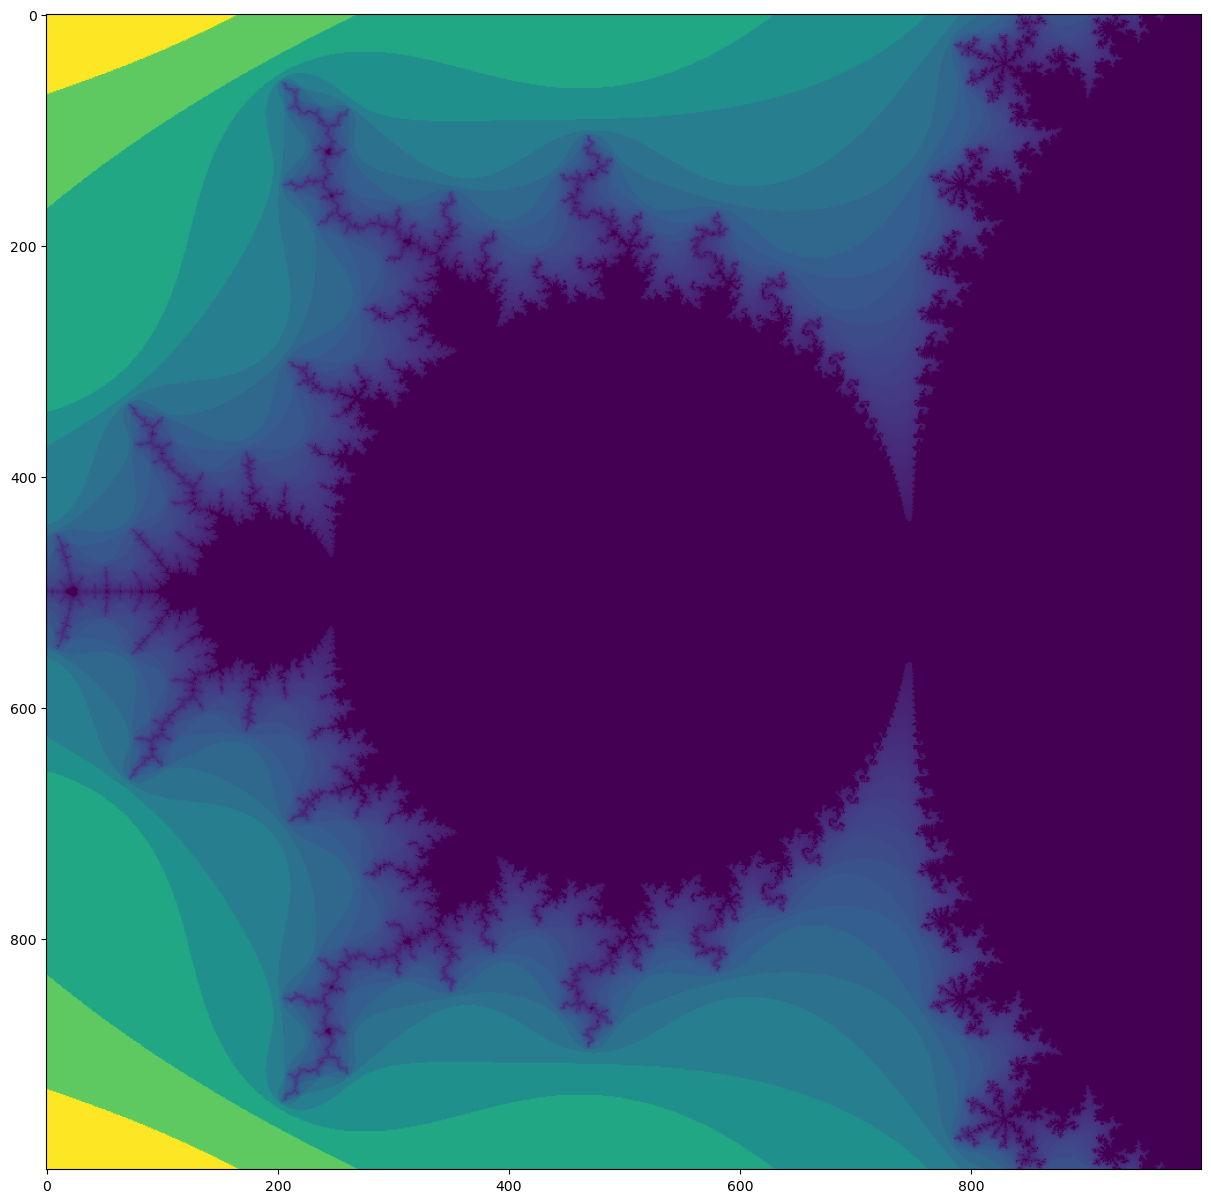

In [69]:
N = 1000
real_space = np.linspace(-1.5, -0.5, N)
imag_space = np.linspace(-0.5, 0.5, N)

# real_space = np.arange(-1, 3, 1/N)
# imag_space = np.arange(-1, 3, 1/N)

real_grid, imag_grid = np.meshgrid(real_space, imag_space)

max_iter = 50
points = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        z = complex(0, 0)
        c = complex(real_grid[i][j], imag_grid[i][j])
        add = True
        for k in range(max_iter):
            z = z ** 2 + c
            if abs(z) > 2:
                add = False
                break
        if not add: points[i, j] = 1 / (k + 1) 

plt.figure(figsize=(15, 15))
plt.imshow(points)

# Множество Жюлиа

In [46]:
c = complex(-0.7, 0.5251993)
R = 1.5

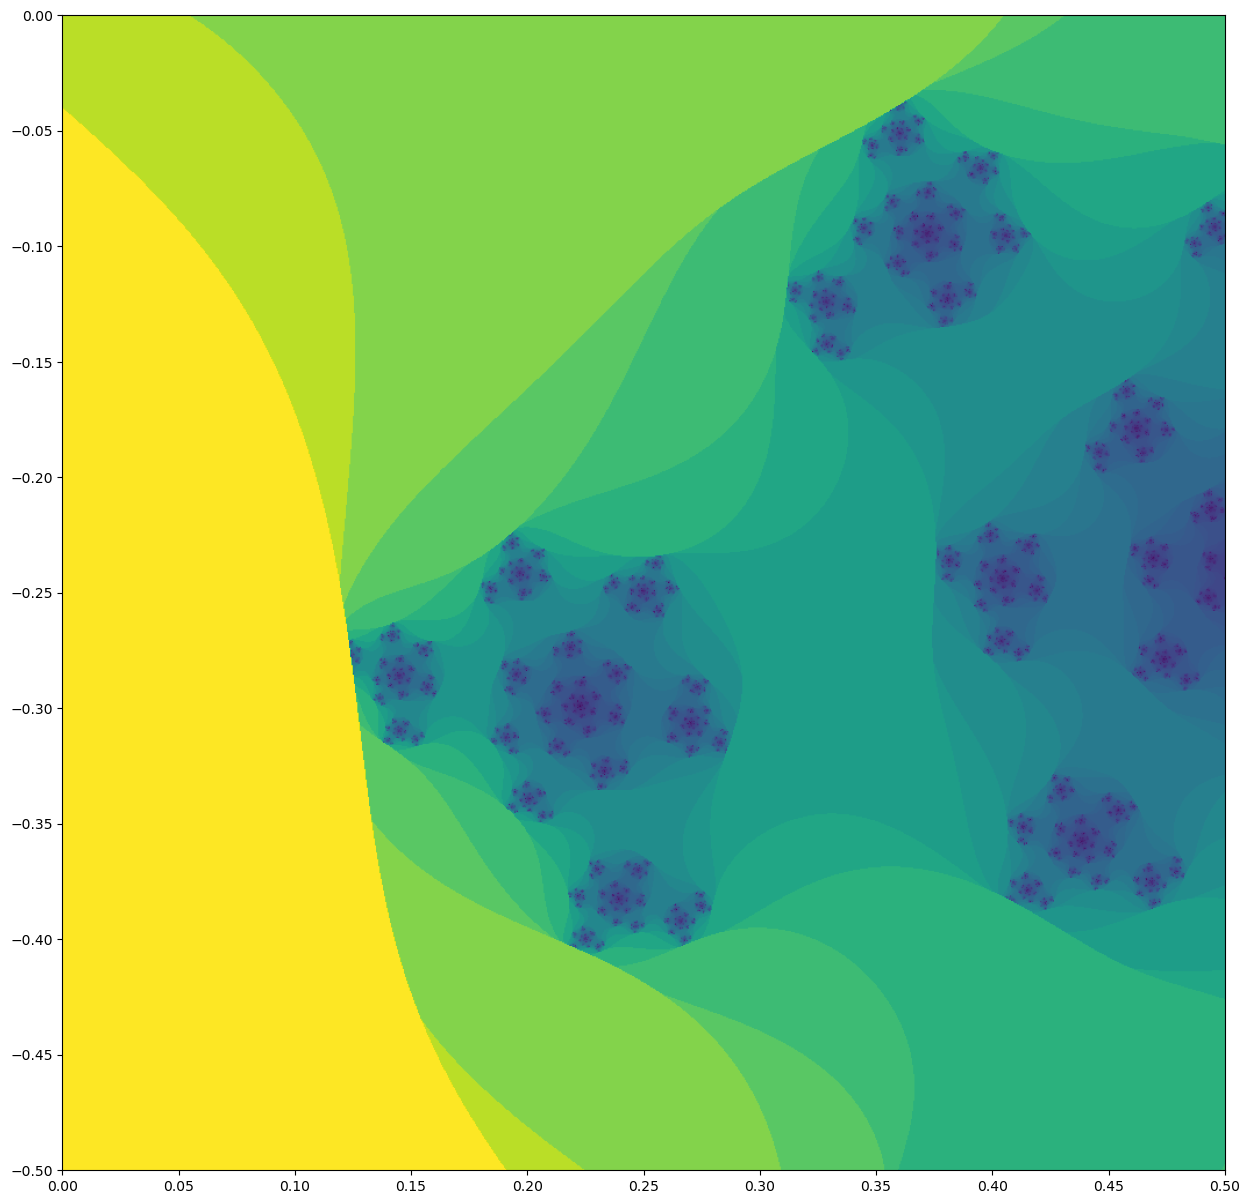

In [61]:
N = 1000


min_real, max_real = 0, 1/2
min_imag, max_imag = -1/2, 0
real_space = np.linspace(min_real, max_real, N)
imag_space = np.linspace(min_imag, max_imag, N)

real_grid, imag_grid = np.meshgrid(real_space, imag_space)

max_iter = 100
points = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        z = complex(real_grid[i][j], imag_grid[i][j])
        add = True
        for k in range(max_iter):
            z = z ** 2 + c
            if abs(z) >= R:
                add = False
                break
        if not add: points[i, j] = 1 / (k + 1) ** 0.5

plt.figure(figsize=(15, 15))
plt.imshow(points, extent=(min_real, max_real, min_imag, max_imag), aspect='auto')

plt.xticks(np.arange(min_real, max_real + (max_real - min_real) / 10, (max_real - min_real) / 10)) 
plt.yticks(np.arange(min_imag, max_imag + (max_imag - min_imag) / 10, (max_imag - min_imag) / 10))    

plt.show()

# Треугольник Серпинского

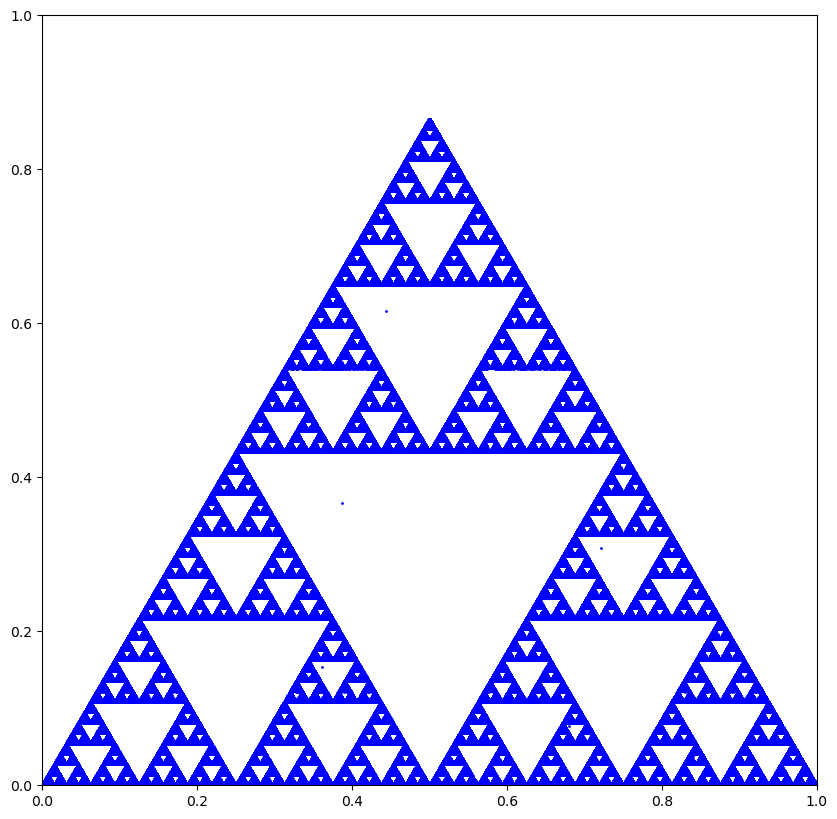

In [74]:
# Задаем вершины треугольника
A = [0, 0]
B = [0.5, np.sqrt(3) / 2]
C = [1, 0]
ABC = [A, B, C]

# Задаем начальную точку
p = [[np.random.rand(), np.random.rand()]]

# Генерируем точки
for _ in range(1_000_000):
    U = ABC[np.random.randint(0, 3)] # Выбираем случайную вершину треугольника ABC
    G = p[-1] # Берем последнюю точку
    # Новая точка - это середина отрезка GU
    nx = (U[0] + G[0]) / 2 
    ny = (U[1] + G[1]) / 2
    p.append([nx, ny])

p = np.array(p)

plt.figure(figsize=(10, 10))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.scatter(p[:, 0], p[:, 1], color='blue', s=1)
plt.show()
